In [1]:
import sys
sys.path.append("../")
import pandas as pd
        
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot





In [2]:
from infrastructure.instrument_collection import instrumentCollection as ic

In [117]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10, 20, 50, 100, 200]

In [118]:
df.columns


Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [119]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [120]:
df_ma.head(10)

,time,mid_o,mid_h,mid_l,mid_c
0,2022-01-26 02:00:00+00:00,1.13056,1.13108,1.13007,1.13045
1,2022-01-26 06:00:00+00:00,1.13046,1.13053,1.12833,1.12869
2,2022-01-26 10:00:00+00:00,1.12868,1.12882,1.12716,1.12824
3,2022-01-26 14:00:00+00:00,1.12826,1.12965,1.12740,1.12880
4,2022-01-26 18:00:00+00:00,1.12881,1.13015,1.12353,1.12410
5,2022-01-26 22:00:00+00:00,1.12418,1.12434,1.12305,1.12329
6,2022-01-27 02:00:00+00:00,1.12328,1.12335,1.12155,1.12200
7,2022-01-27 06:00:00+00:00,1.12199,1.12216,1.11929,1.11964
8,2022-01-27 10:00:00+00:00,1.11962,1.12010,1.11350,1.11494
9,2022-01-27 14:00:00+00:00,1.11492,1.11622,1.11316,1.11392


In [121]:
for ma in MA_LIST:
    df_ma[f"MA_{ma}"] = df_ma.mid_c.rolling(window = ma).mean()

df_ma.dropna(inplace = True)
df_ma.reset_index(inplace = True, drop= True)


In [122]:
df_plot = df_ma.iloc[:500]
df_plot.shape

(500, 10)

In [123]:
traces = [ f"MA_{x}" for x in MA_LIST ]
traces

['MA_10', 'MA_20', 'MA_50', 'MA_100', 'MA_200']

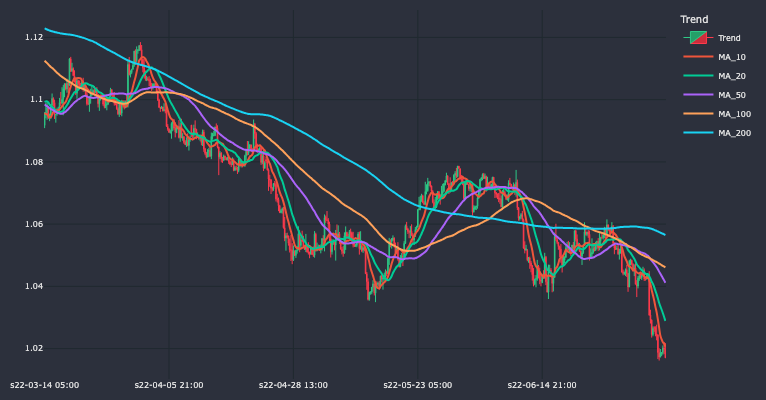

In [124]:
cp = CandlePlot(df_plot)

cp.show_plot(line_traces = traces)

In [125]:
MA_S = "MA_10"
MA_L = "MA_200"
BUY = 1
SELL = -1
NONE = 0

In [126]:
df_an = df_ma[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', MA_S, MA_L]].copy()

In [127]:
df_an.head(30)

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_200
0,2022-03-14 05:00:00+00:00,1.09172,1.09600,1.09086,1.09566,1.095725,1.122891
1,2022-03-14 09:00:00+00:00,1.09562,1.09900,1.09402,1.09578,1.095419,1.122718
2,2022-03-14 13:00:00+00:00,1.09576,1.09940,1.09350,1.09742,1.095283,1.122561
3,2022-03-14 17:00:00+00:00,1.09742,1.09794,1.09396,1.09400,1.094691,1.122390
4,2022-03-14 21:00:00+00:00,1.09464,1.09554,1.09308,1.09504,1.094521,1.122221
5,2022-03-15 01:00:00+00:00,1.09504,1.09854,1.09376,1.09825,1.094364,1.122092
6,2022-03-15 05:00:00+00:00,1.09826,1.10199,1.09668,1.10038,1.095238,1.121978
7,2022-03-15 09:00:00+00:00,1.10036,1.10076,1.09780,1.09904,1.096022,1.121863
8,2022-03-15 13:00:00+00:00,1.09906,1.10000,1.09381,1.09514,1.096244,1.121740
9,2022-03-15 17:00:00+00:00,1.09514,1.09542,1.09261,1.09522,1.096593,1.121642


In [129]:
df_an['DELTA'] = df_an.MA_10 - df_an.MA_200
df_an['DELTA_PREV'] = df_an.DELTA.shift(1)

In [130]:
def is_trade(row):
    if row.DELTA >= 0 and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0 and row.DELTA_PREV >= 0:
        return SELL
    return NONE

In [131]:
df_an['TRADE'] = df_an.apply(is_trade, axis=1)

In [132]:
df_trades=  df_an[df_an.TRADE != NONE].copy()

In [133]:
df_trades.shape

(39, 10)

In [134]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_200,DELTA,DELTA_PREV,TRADE
76,2022-03-30 21:00:00+00:00,1.11580,1.11749,1.11564,1.11742,1.112592,1.111345,0.001247,-0.000756,1
85,2022-04-01 09:00:00+00:00,1.10610,1.10678,1.10366,1.10442,1.109518,1.110271,-0.000753,0.000256,-1
307,2022-05-24 09:00:00+00:00,1.07048,1.07280,1.06957,1.07076,1.065821,1.065093,0.000728,-0.000897,1
388,2022-06-12 21:00:00+00:00,1.05154,1.05203,1.04806,1.04850,1.059197,1.059951,-0.000754,0.001464,-1
644,2022-08-10 13:00:00+00:00,1.03243,1.03688,1.03052,1.03251,1.023951,1.023693,0.000258,-0.001187,1


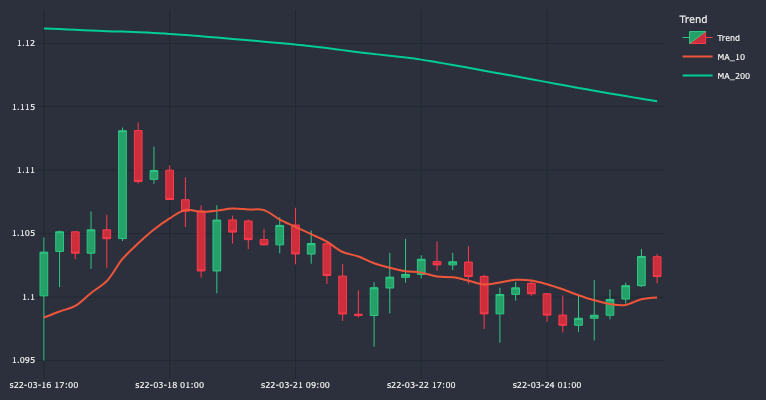

In [135]:
cp = CandlePlot(df_an.iloc[15:55])
cp.show_plot(line_traces=[MA_S, MA_L])

In [136]:
ic.LoadInstruments("../data")

In [137]:
ic.instruments_dict[pair]

{'name': 'EUR_USD', 'ins_type': 'CURRENCY', 'displayName': 'EUR/USD', 'pipLocation': 0.0001, 'tradeUnitsPrecision': 0, 'marginRate': 0.02}

In [146]:
ins_data = ic.instruments_dict[pair]

In [139]:
df_trades.tail()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_200,DELTA,DELTA_PREV,TRADE
3342,2024-05-06 05:00:00+00:00,1.07628,1.07762,1.07576,1.07684,1.075508,1.075155,0.000353,-0.000213,1
3494,2024-06-10 13:00:00+00:00,1.07414,1.07589,1.07332,1.07542,1.080090,1.080267,-0.000177,0.001211,-1
3603,2024-07-04 17:00:00+00:00,1.08123,1.08138,1.08108,1.08119,1.079188,1.078604,0.000584,-0.000134,1
3725,2024-08-02 01:00:00+00:00,1.07910,1.07988,1.07846,1.07976,1.080376,1.080698,-0.000322,0.000145,-1
3727,2024-08-02 09:00:00+00:00,1.08148,1.08971,1.08147,1.08911,1.081076,1.080822,0.000254,-0.000309,1


In [140]:
df_trades['DIFF'] = df_trades.mid_c.diff().shift(-1)
df_trades.fillna(0, inplace= True)

In [141]:
df_trades['GAIN'] = df_trades['DIFF'] / ins_data.pipLocation
df_trades['GAIN'] = df_trades['GAIN'] * df_trades['TRADE']

In [142]:
df_trades.GAIN.sum()

np.float64(-207.30000000000814)

In [143]:
df_trades['GAIN_C'] = df_trades['GAIN'].cumsum()

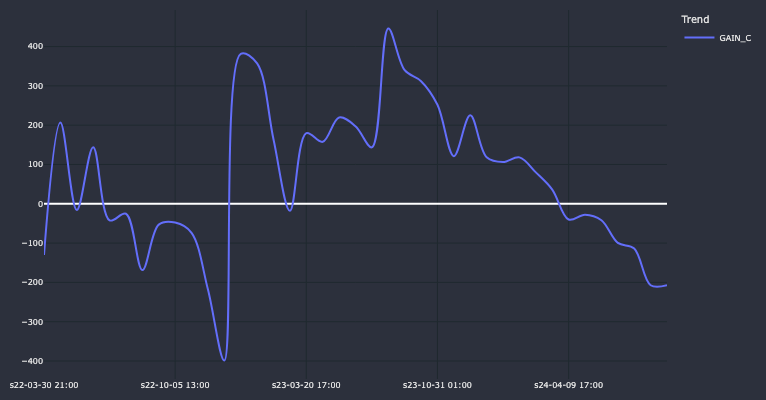

In [144]:
cp = CandlePlot(df_trades, candles= False)
cp.show_plot(line_traces=['GAIN_C'])